In [70]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt

In [71]:
file_path = "../batch/data/sensors.csv"
df = pd.read_csv(file_path, parse_dates=["event_time"])
df.head()

,event_time,machine_id,temperature,vibration,rpm
0,2025-06-20 19:31:43.041320,M-001,63.06,0.063,1725
1,2025-06-20 19:31:43.082343,M-002,77.72,0.233,2018
2,2025-06-20 19:31:43.125830,M-002,60.48,0.201,1693
3,2025-06-20 19:31:43.162174,M-004,77.05,0.089,2092
4,2025-06-20 19:31:43.193086,M-001,80.47,0.092,2038


In [72]:
print("Static temperature:")
print(df["temperature"].describe())

Static temperature:
count    499.000000
mean      75.566012
std        8.573704
min       60.100000
25%       68.480000
50%       76.170000
75%       83.210000
max       89.980000
Name: temperature, dtype: float64


In [73]:
print("Count of records per machine:")
print(df["machine_id"].value_counts())

Count of records per machine:
machine_id
M-002    110
M-003    110
M-001    101
M-004     92
M-005     86
Name: count, dtype: int64


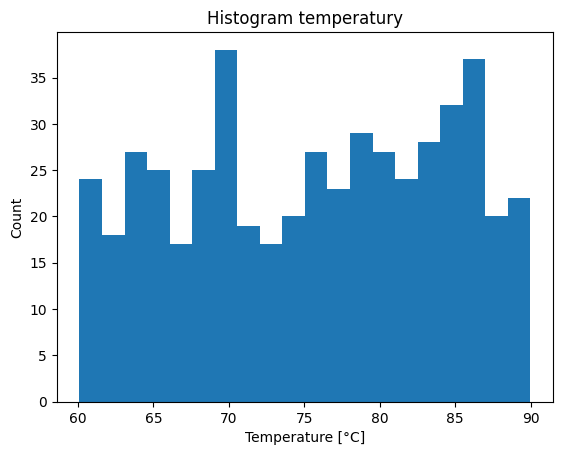

In [74]:
plt.figure()
plt.hist(df["temperature"], bins=20)
plt.xlabel("Temperature [°C]")
plt.ylabel("Count")
plt.title("Histogram temperatury")
plt.show()

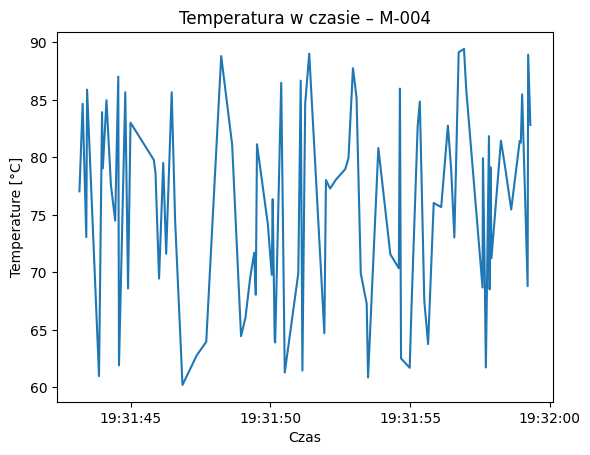

In [75]:
machine = "M-004"
sub = df[df["machine_id"] == machine].set_index("event_time")

plt.figure()
plt.plot(sub.index, sub["temperature"])
plt.xlabel("Czas")
plt.ylabel("Temperature [°C]")
plt.title(f"Temperatura w czasie – {machine}")
plt.show()

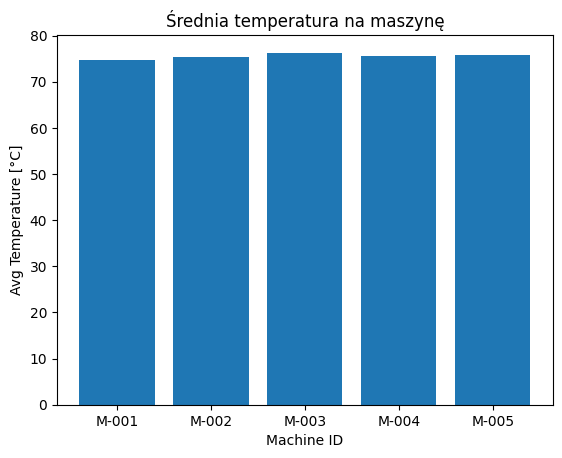

In [76]:
means = df.groupby("machine_id")["temperature"].mean()

plt.figure()
plt.bar(means.index, means.values)
plt.xlabel("Machine ID")
plt.ylabel("Avg Temperature [°C]")
plt.title("Średnia temperatura na maszynę")
plt.show()

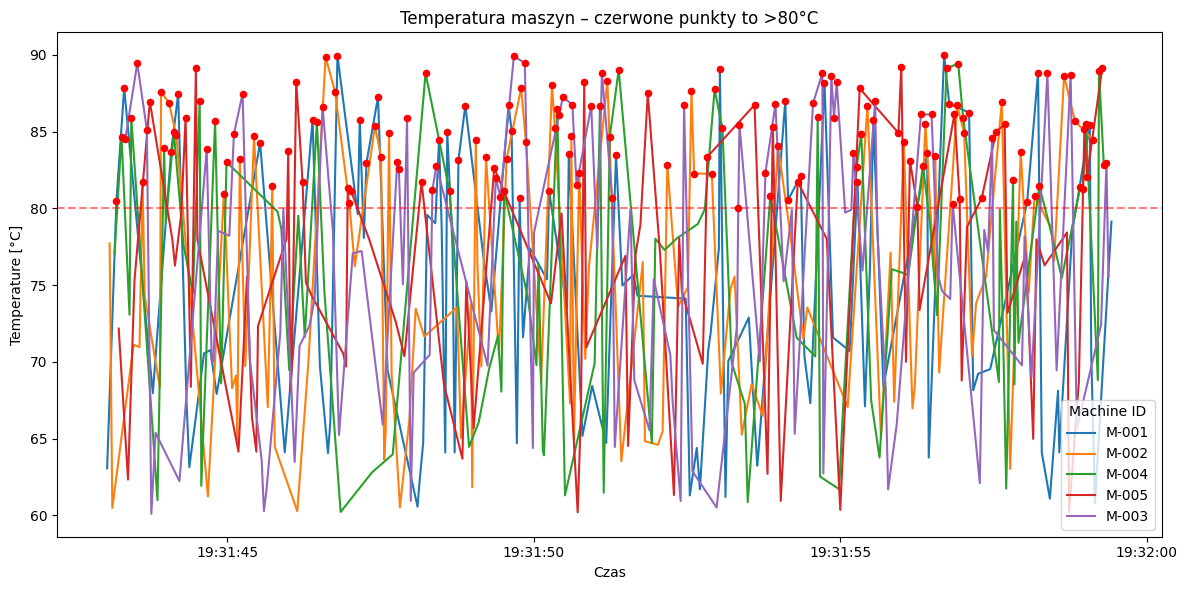

In [77]:
plt.figure(figsize=(12, 6))

threshold = 80
for machine in df["machine_id"].unique():
      sub = df[df["machine_id"] == machine].set_index("event_time").sort_index()
      
      plt.plot(sub.index, sub["temperature"], label=machine)
      
      high = sub[sub["temperature"] > threshold]
      plt.scatter(high.index, high["temperature"],
                  color="red", s=20, zorder=5)

plt.axhline(threshold, color="red", linestyle="--", alpha=0.5)
plt.xlabel("Czas")
plt.ylabel("Temperature [°C]")
plt.title("Temperatura maszyn – czerwone punkty to >80°C")
plt.legend(title="Machine ID")
plt.tight_layout()
plt.show()
